In [2]:
import numpy as np
from scipy.stats import skew
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

/content/train.csv

In [3]:
data_train = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/test.csv")

In [4]:
pd.set_option('display.max_columns', 100)
data_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [5]:
data_train.shape

(1460, 81)

In [6]:
data_test.shape

(1459, 80)

In [7]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
# How many null values per feature in train data ?
data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
# Percentage of null values ​​in proportion to the total number of observations
data_train.isnull().sum() / data_train.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [13]:
data_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [14]:
data_test.isnull().sum() / data_test.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [15]:
# Há observações duplicadas? (não)
data_train[data_train.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [16]:
data_test[data_test.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

In [17]:
total_null = data_train.isnull().sum().sort_values(ascending=False)
percentage_null = (data_train.isnull().sum() / data_train.shape[0]*100).sort_values(ascending=False)
missing_values_data = pd.concat([total_null, percentage_null], axis=1, keys=['Total', 'Percentage'])

missing_values_data.head(20)

Total  Percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageYrBlt      81    5.547945
GarageCond       81    5.547945
GarageType       81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493
Id                0    0.000000

In [18]:
# Searching for columns with more than 80% of null values for removal
most_null_values_list_train = []
most_null_values_list_test = []

for i in data_train.columns:
    percent = data_train[i].isnull().sum() / data_train.shape[0]*100

    if percent >= 80:
        most_null_values_list_train.append(i)
    else:
        continue

for j in data_test.columns:
    percent = data_test[j].isnull().sum() / data_test.shape[0]*100

    if percent >= 80:
        most_null_values_list_test.append(j)
    else:
        continue

print(most_null_values_list_train)
print(most_null_values_list_test)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [19]:
# Dropping columns with 80% (or more) of null values from the train data (Initial cleaning of useless data)
data_train = data_train.drop(most_null_values_list_train, axis=1)
data_test = data_test.drop(most_null_values_list_test, axis=1)

In [20]:
data_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [21]:
# Describing categorical variables
data_train.describe(include=[object])

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1460       1460       1460     1460       1460      1460   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            225       1260       1445     1220        726      1141   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1460        1460        1460        588      1460      1460   
unique        8          15          16          3         4         5   
top     CompShg     VinylSd     VinylSd    BrkFace        TA        TA   
freq       1434         515         504        445       906      1282   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1460     1423     1423         1422         1423         1422   
unique          6        4        4            4            6            6   
top         PConc       TA       TA           No          Unf          Unf   
freq          647      649     1311          953          430         1256   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1460      1460       1460       1459        1460       1460   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1428       741       1365       1334         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count          770       1379         1379       1379       1379       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq           380        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198

In [22]:
# Creating a dataset just for the data analysis

analysis_data_train_num = data_train.select_dtypes(include=[np.number]) # Only numerical features
analysis_data_train_cat = data_train.select_dtypes(exclude=[np.number]) # Only categorical features

In [23]:
# Calculating the IQR
q1 = np.nanpercentile(analysis_data_train_num.SalePrice, 25)
q3 = np.nanpercentile(analysis_data_train_num.SalePrice, 75)

iqr = q3 - q1

print(iqr)

84025.0


# Univariate analysis for numerical and categorical features

(by this method we can see if the most part of the data is in a normal distribution or not)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

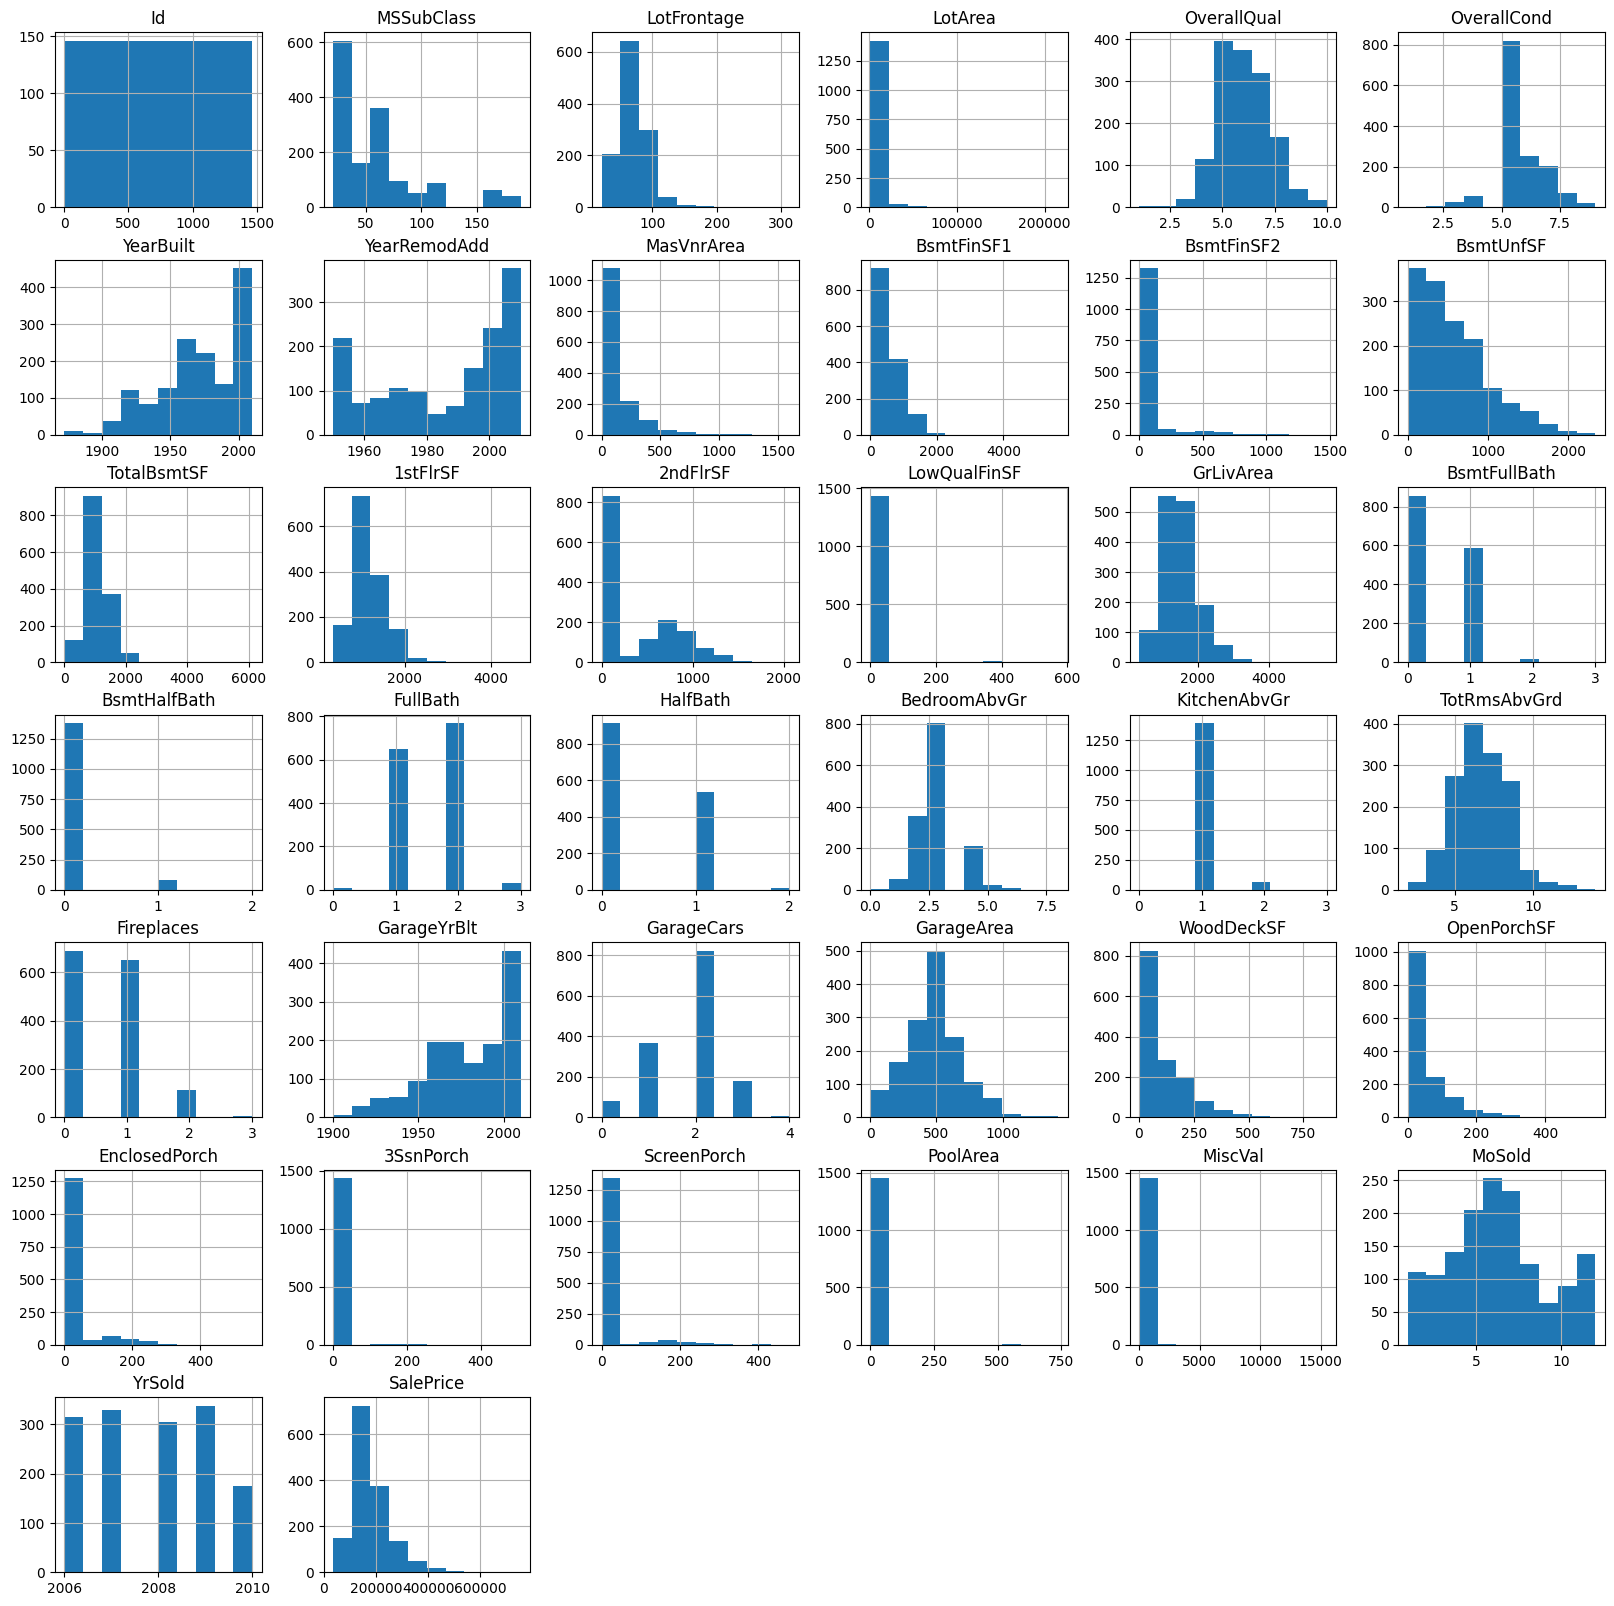

In [24]:
# Check if any feature is skewed, if True, make the transformation (by log, for example, or other)
analysis_data_train_num.hist(figsize=(20,20))

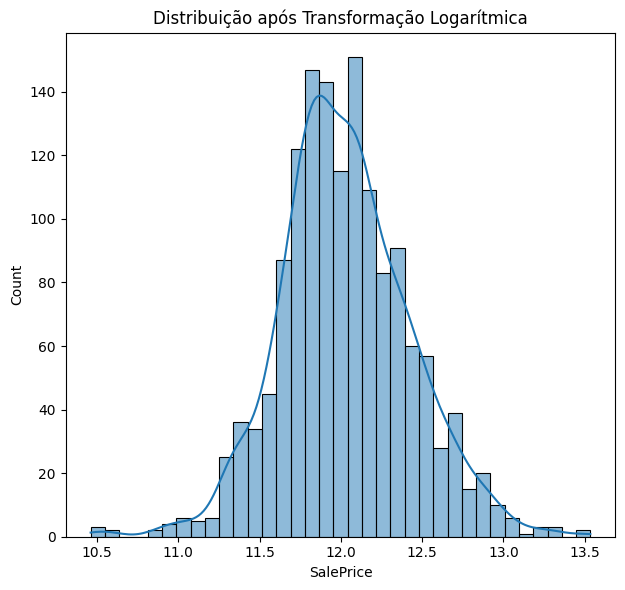

In [25]:
# Representation of the feature SalePrice after the log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(np.log(analysis_data_train_num['SalePrice'] + 1), kde=True)
plt.title('Distribuição após Transformação Logarítmica')

plt.tight_layout()
plt.show()

In [26]:
# The skewness after the log transformation
print(np.log(analysis_data_train_num['SalePrice'] + 1).skew())

0.12134661989685329


In [27]:
# Doing the assymetry test only for variables with more than 5 unique values to not get discrete quantitative variables
# (features like quantity of cars, etc

for i in analysis_data_train_num.columns:
    if len(analysis_data_train_num[i].unique()) > 5:
        print(f'{i}: {analysis_data_train_num[i].skew()}')

Id: 0.0
MSSubClass: 1.4076567471495591
LotFrontage: 2.163569142324884
LotArea: 12.207687851233496
OverallQual: 0.2169439277628693
OverallCond: 0.6930674724842182
YearBuilt: -0.613461172488183
YearRemodAdd: -0.5035620027004709
MasVnrArea: 2.669084210182863
BsmtFinSF1: 1.685503071910789
BsmtFinSF2: 4.255261108933303
BsmtUnfSF: 0.9202684528039037
TotalBsmtSF: 1.5242545490627664
1stFlrSF: 1.3767566220336365
2ndFlrSF: 0.8130298163023265
LowQualFinSF: 9.011341288465387
GrLivArea: 1.3665603560164552
BedroomAbvGr: 0.21179009627507137
TotRmsAbvGrd: 0.6763408364355531
GarageYrBlt: -0.6494146238714679
GarageArea: 0.17998090674623907
WoodDeckSF: 1.5413757571931312
OpenPorchSF: 2.3643417403694404
EnclosedPorch: 3.08987190371177
3SsnPorch: 10.304342032693112
ScreenPorch: 4.122213743143115
PoolArea: 14.828373640750588
MiscVal: 24.476794188821916
MoSold: 0.21205298505146022
SalePrice: 1.8828757597682129


Outliers Analysis and distribution of the data by boxplots

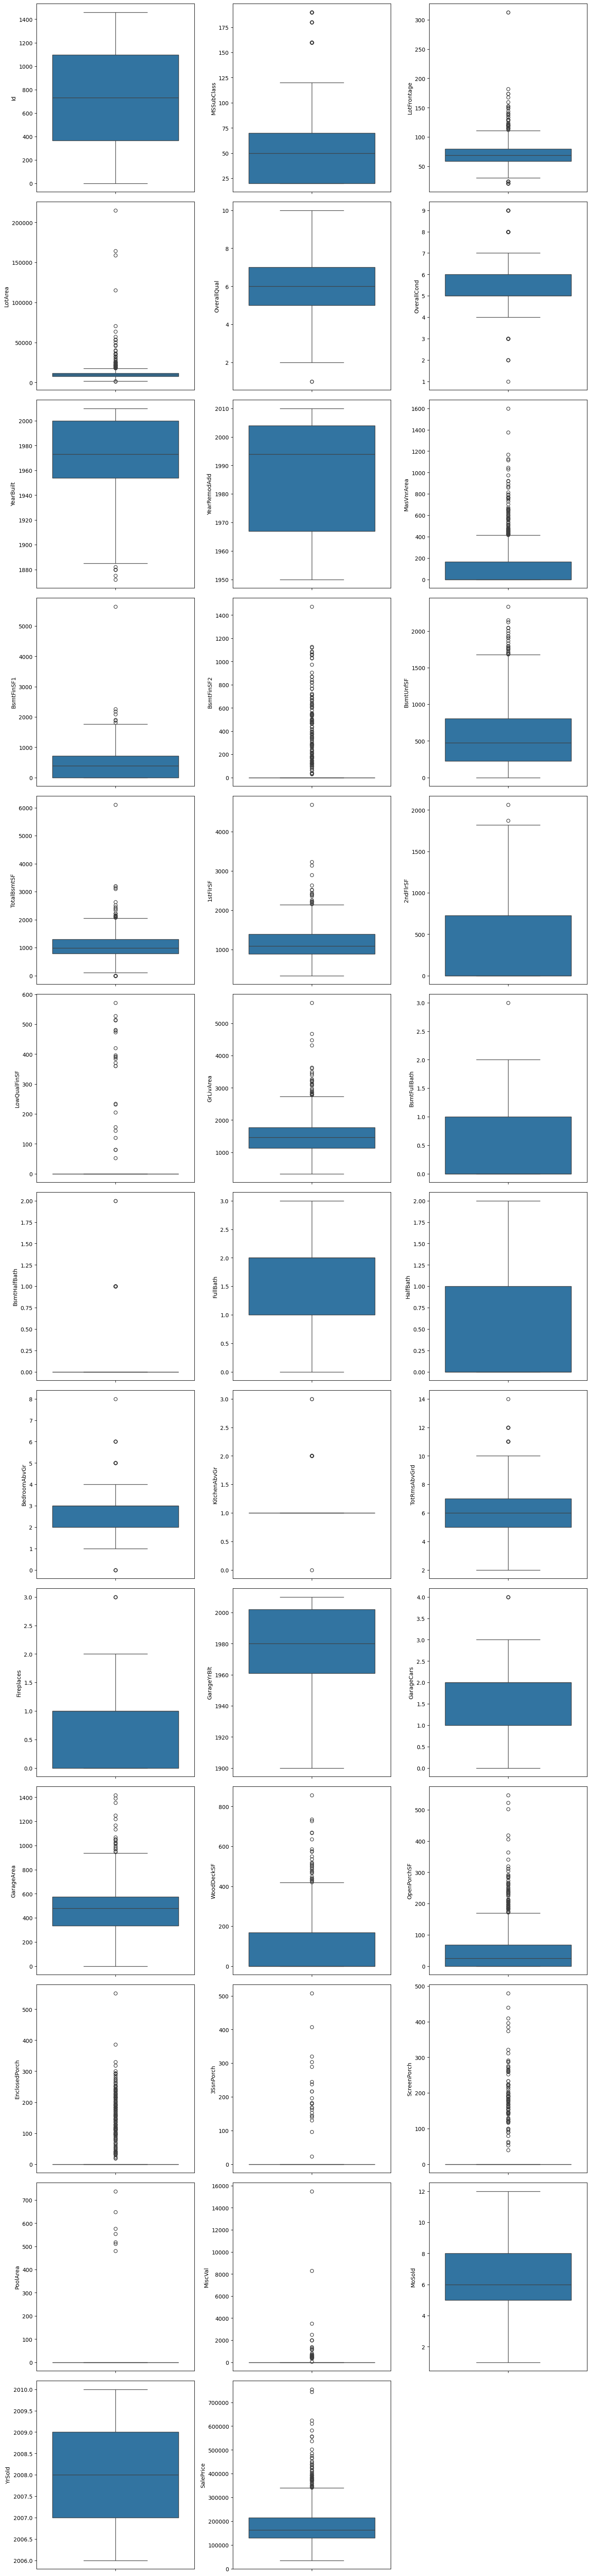

In [28]:
# number of graphs in a row
cols_per_row = 3

# Number of necessary cols
num_cols = len(analysis_data_train_num.columns)
num_rows = -(-num_cols // cols_per_row)  # arredondar para cima

# Subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and plot boxplots
for i, column in enumerate(analysis_data_train_num.columns):
    sns.boxplot(y=analysis_data_train_num[column], ax=axes[i])
    axes[i].set_ylabel(column)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [29]:
# Valores os quais o modelo considera como outliers por meio do z-score
# Detecting possible features with outliers using z_score (considering values greater than 3 or less than -3)

import scipy.stats as stats

z_list = []

for col in analysis_data_train_num.columns:
    z_scores = stats.zscore(analysis_data_train_num[col])
    z_list.clear()

    for i in z_scores:
        if i > 3 or i < -3:
            z_list.append(i)

    print(f'[{col}] has {len(z_list)} values that could be real outliers')

[Id] has 0 values that could be real outliers
[MSSubClass] has 30 values that could be real outliers
[LotFrontage] has 0 values that could be real outliers
[LotArea] has 13 values that could be real outliers
[OverallQual] has 2 values that could be real outliers
[OverallCond] has 28 values that could be real outliers
[YearBuilt] has 6 values that could be real outliers
[YearRemodAdd] has 0 values that could be real outliers
[MasVnrArea] has 0 values that could be real outliers
[BsmtFinSF1] has 6 values that could be real outliers
[BsmtFinSF2] has 50 values that could be real outliers
[BsmtUnfSF] has 11 values that could be real outliers
[TotalBsmtSF] has 10 values that could be real outliers
[1stFlrSF] has 12 values that could be real outliers
[2ndFlrSF] has 4 values that could be real outliers
[LowQualFinSF] has 20 values that could be real outliers
[GrLivArea] has 16 values that could be real outliers
[BsmtFullBath] has 16 values that could be real outliers
[BsmtHalfBath] has 82 valu

# Categorical variables analysis

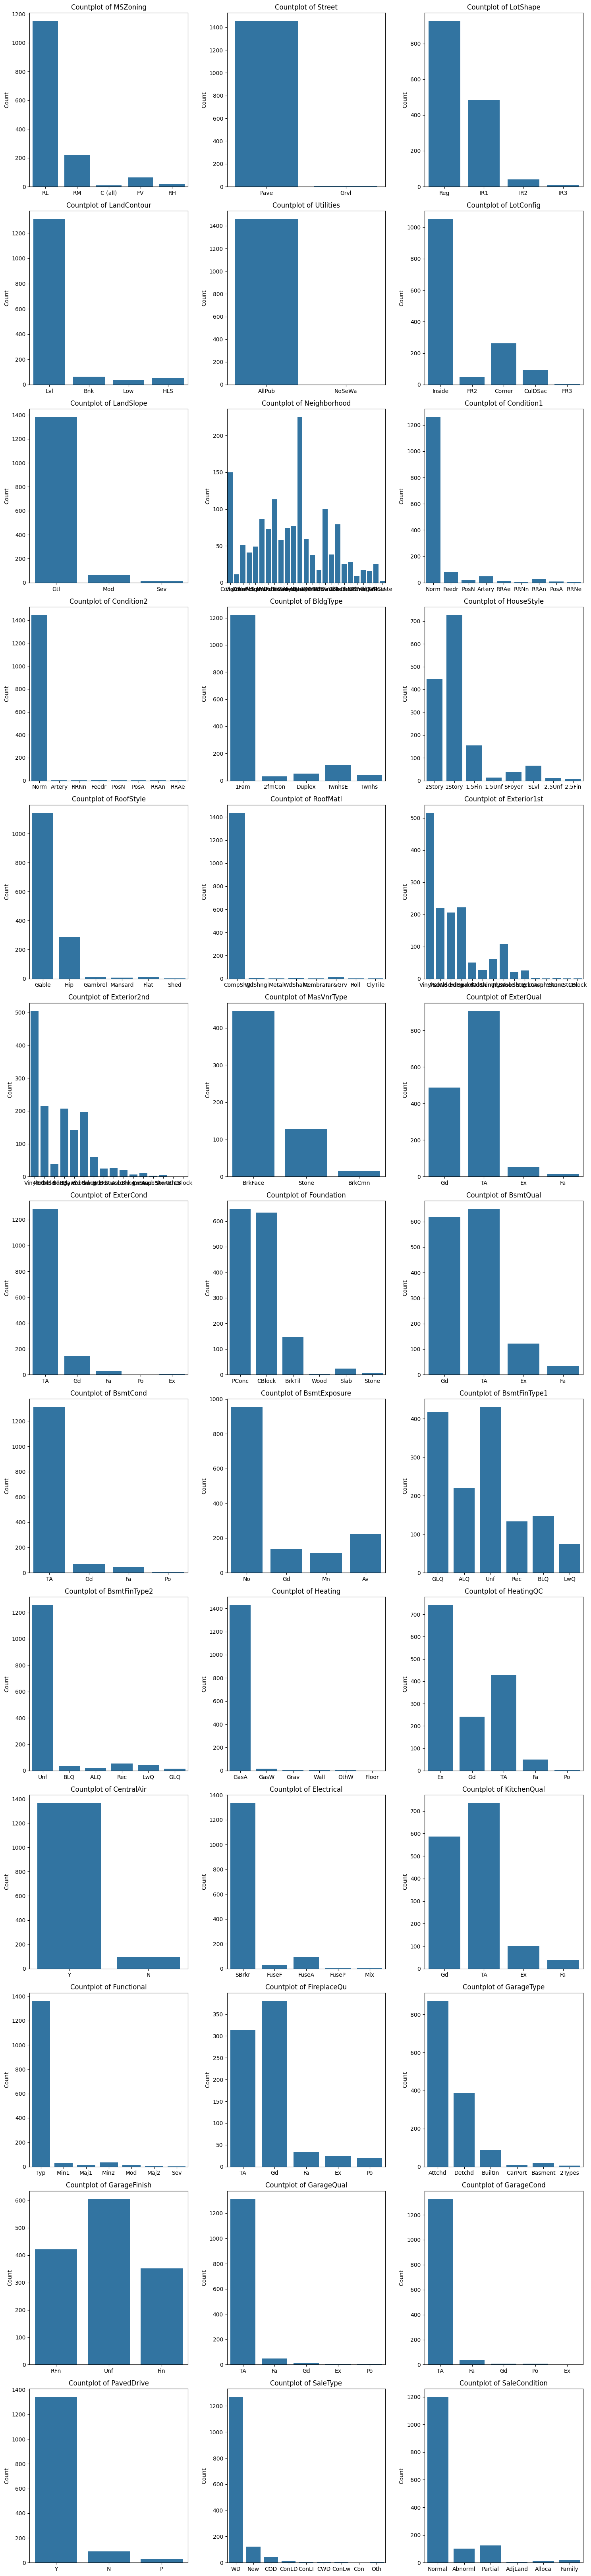

In [30]:
num_vars = len(analysis_data_train_cat.columns)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(analysis_data_train_cat.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(x=col, data=analysis_data_train_cat, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Remover eixos não utilizados se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

- Cerca de 78% das propriedas são localizadas em zonas de baixa densidade residencial
- 99,58% das ruas em que as propriedades se encontram são pavimentadas
- 33.15% of properties have it's shape slightly irregular. A considerable amount

# Bivariate analysis

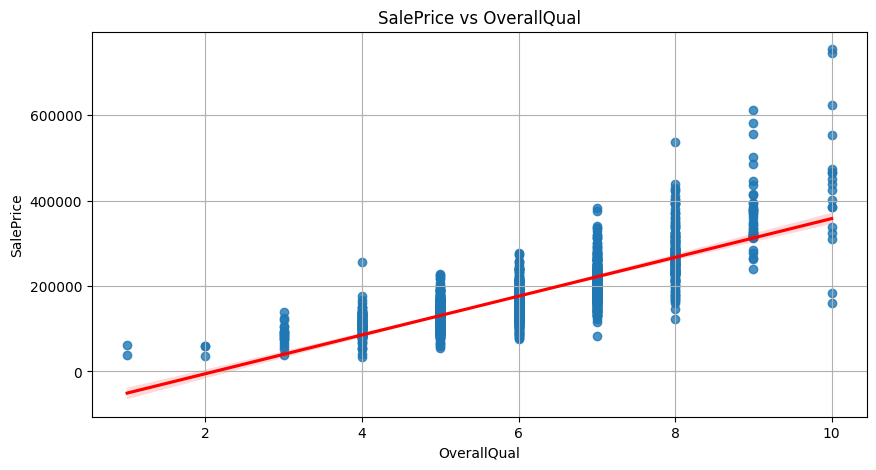

In [99]:
plt.figure(figsize=(10, 5))
sns.regplot(data=analysis_data_train_num, x="OverallQual", y="SalePrice", line_kws={"color": "red"})
plt.title("SalePrice vs OverallQual")
plt.grid(True)
plt.show()

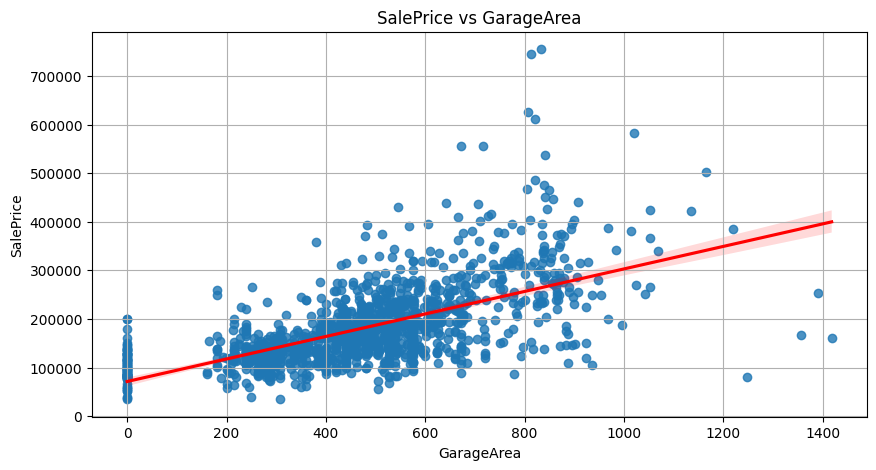

In [100]:
plt.figure(figsize=(10, 5))
sns.regplot(data=analysis_data_train_num, x="GarageArea", y="SalePrice", line_kws={"color": "red"})
plt.title("SalePrice vs GarageArea")
plt.grid(True)
plt.show()

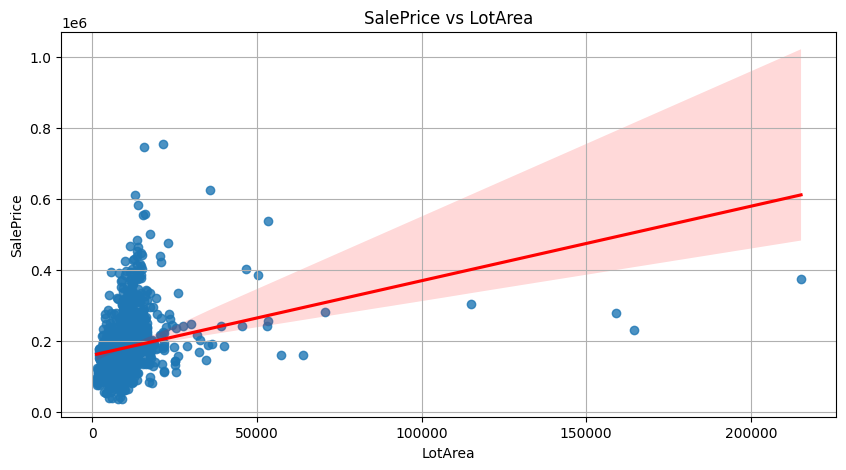

In [101]:
plt.figure(figsize=(10, 5))
sns.regplot(data=analysis_data_train_num, x="LotArea", y="SalePrice", line_kws={"color": "red"})
plt.title("SalePrice vs LotArea")
plt.grid(True)
plt.show()

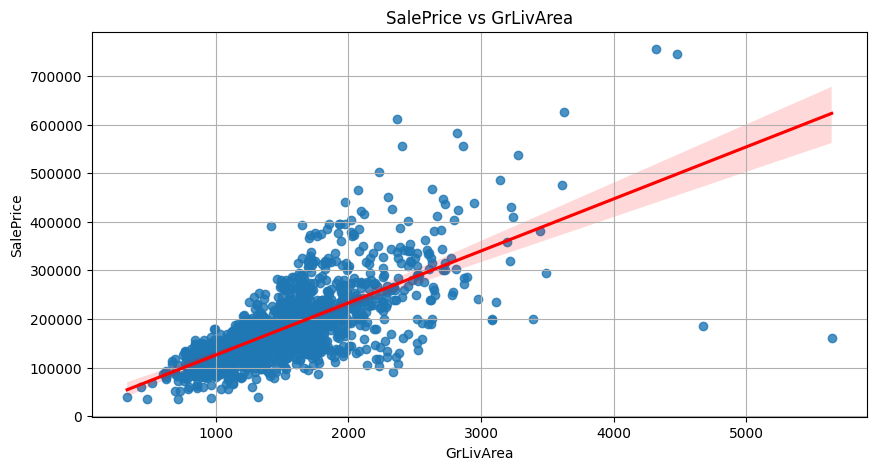

In [102]:
plt.figure(figsize=(10, 5))
sns.regplot(data=analysis_data_train_num, x="GrLivArea", y="SalePrice", line_kws={"color": "red"})
plt.title("SalePrice vs GrLivArea")
plt.grid(True)
plt.show()

In [35]:
analysis_data_train_cat

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd        NaN        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng        NaN        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd        NaN        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd        NaN        Ex        Gd   
1458  CompShg     MetalSd     MetalSd        NaN        TA        TA   
1459  CompShg     HdBoard     HdBoard        NaN        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

# Barplot (bivariate analysis) between categorical variables and the target variable

Text(0.5, 1.0, 'Foundation Vs SalePrice')

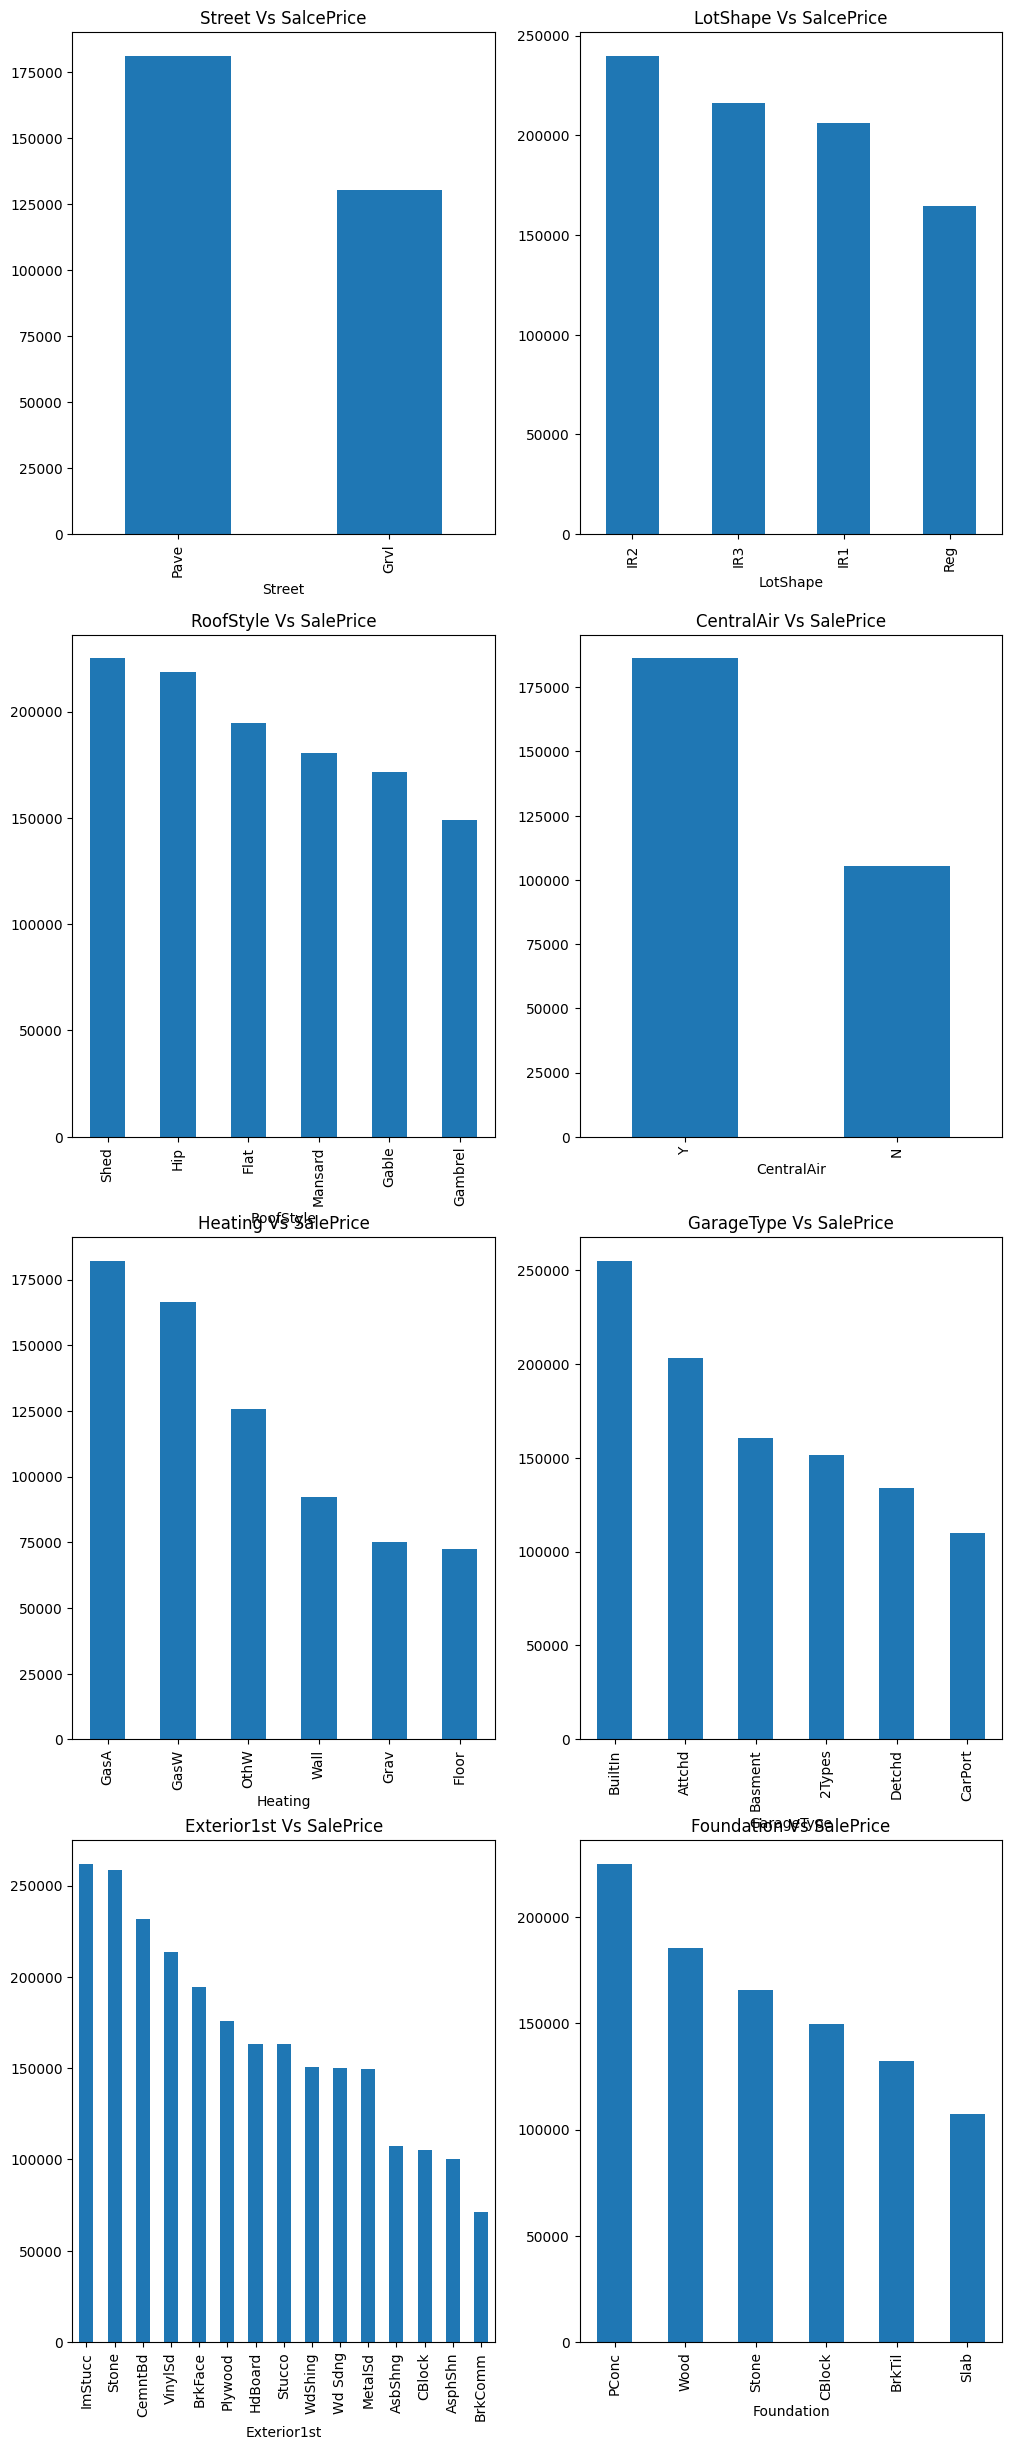

In [36]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 30))
data_train.groupby('Street')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=10)
axarr[0][0].set_title("Street Vs SalcePrice", fontsize=12)

data_train.groupby('LotShape')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=10)
axarr[0][1].set_title("LotShape Vs SalcePrice", fontsize=12)

data_train.groupby('RoofStyle')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=10)
axarr[1][0].set_title("RoofStyle Vs SalePrice", fontsize=12)

data_train.groupby('CentralAir')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=10)
axarr[1][1].set_title("CentralAir Vs SalePrice", fontsize=12)

data_train.groupby('Heating')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=10)
axarr[2][0].set_title("Heating Vs SalePrice", fontsize=12)

data_train.groupby('GarageType')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=10)
axarr[2][1].set_title("GarageType Vs SalePrice", fontsize=12)

data_train.groupby('Exterior1st')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=10)
axarr[3][0].set_title("Exterior1st Vs SalePrice", fontsize=12)

data_train.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=10)
axarr[3][1].set_title("Foundation Vs SalePrice", fontsize=12)

- Houses located on pave streets tends to be more expensive
- Lots moderately irregular are high price meanwhile Regular lots are lower price
- The price of houses with shed roof style is higher and lower with Gambrel roof style
- Expensive houses tends to have a central air in its interior
- Houses with Built-in garages are more expensive.
- Houses with Imitation Stucco and houses with stone as external material are high price while houses with Brick Common are lower price
- Houses with Wood Siding, Wood Shingles or Metal Siding on its exterior covering tends to have no difference in the final price

# Multivariate Analysis

Correlation "heatmap"

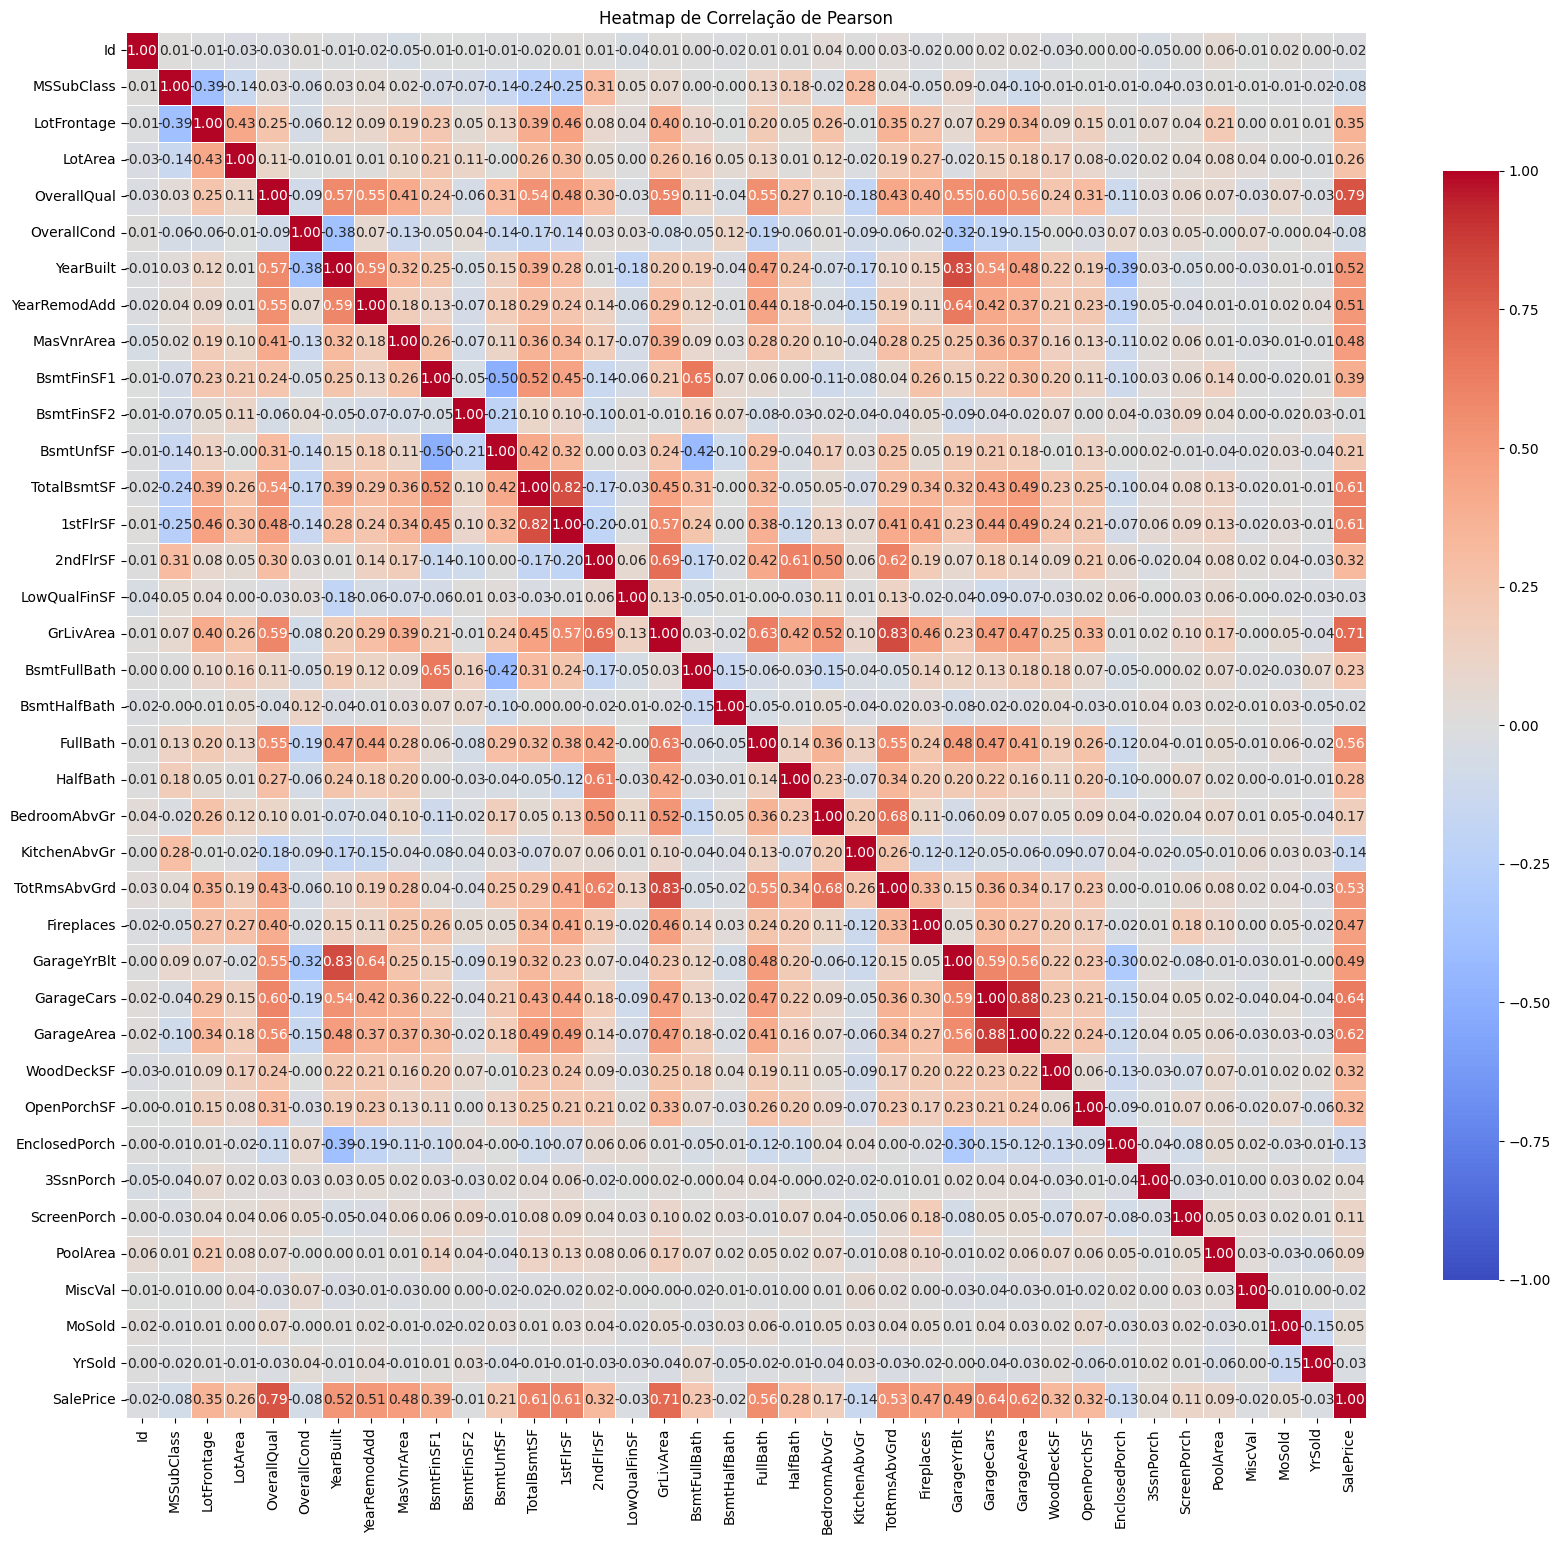

In [37]:
correlation_matrix = analysis_data_train_num.corr()

# Criar o heatmap
plt.figure(figsize=(20, 18))  # Ajuste o tamanho da figura conforme necessário
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      fmt=".2f",
                      cmap='coolwarm',
                      vmin=-1,
                      vmax=1,
                      cbar_kws={'shrink': .8},
                      linewidths=.5)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Heatmap de Correlação de Pearson')

plt.show()

In [38]:
# Creating a copy of the dataset to test the prediction with some changes on the data
new_analysis_data_train_num = analysis_data_train_num.copy()

In [39]:
# Feature Engineering - creating features that my be helpul for the model (for example, transforming year built and
# year in age column)
today = date.today().year
new_analysis_data_train_num['HouseAge'] = today - new_analysis_data_train_num['YearBuilt']

new_analysis_data_train_num.head(15)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0    1          60         65.0     8450            7            5       2003   
1    2          20         80.0     9600            6            8       1976   
2    3          60         68.0    11250            7            5       2001   
3    4          70         60.0     9550            7            5       1915   
4    5          60         84.0    14260            8            5       2000   
5    6          50         85.0    14115            5            5       1993   
6    7          20         75.0    10084            8            5       2004   
7    8          60          NaN    10382            7            6       1973   
8    9          50         51.0     6120            7            5       1931   
9   10         190         50.0     7420            5            6       1939   
10  11          20         70.0    11200            5            5       1965   
11  12          60         85.0    11924            9            5       2005   
12  13          20          NaN    12968            5            6       1962   
13  14          20         91.0    10652            7            5       2006   
14  15          20          NaN    10920            6            5       1960   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2003       196.0         706           0        150          856   
1           1976         0.0         978           0        284         1262   
2           2002       162.0         486           0        434          920   
3           1970         0.0         216           0        540          756   
4           2000       350.0         655           0        490         1145   
5           1995         0.0         732           0         64          796   
6           2005       186.0        1369           0        317         1686   
7           1973       240.0         859          32        216         1107   
8           1950         0.0           0           0        952          952   
9           1950         0.0         851           0        140          991   
10          1965         0.0         906           0        134         1040   
11          2006       286.0         998           0        177         1175   
12          1962         0.0         737           0        175          912   
13          2007       306.0           0           0       1494         1494   
14          1960       212.0         733           0        520         1253   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        856       854             0       1710             1             0   
1       1262         0             0       1262             0             1   
2        920       866             0       1786             1             0   
3        961       756             0       1717             1             0   
4       1145      1053             0       2198             1             0   
5        796       566             0       1362             1             0   
6       1694         0             0       1694             1             0   
7       1107       983             0       2090             1             0   
8       1022       752             0       1774             0             0   
9       1077         0             0       1077             1             0   
10      1040         0             0       1040             1             0   
11      1182      1142             0       2324             1             0   
12       912         0             0        912             1             0   
13      1494         0             0       1494             0             0   
14      1253         0             0       1253             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0          2         1             3             1             8           0   
1

In principle, there will be no removal of outliers, since the values ​​considered as outliers may be important for the model as they are not outliers, they just deviate from the majority. However, to alleviate this factor, the logarithmic transformation will be applied to very asymmetric features.

In [40]:
# Creating feature TotalFullBath (sum of variables BsmtFullBath and FullBath, dropping both at last)
new_analysis_data_train_num['TotalFullBath'] = new_analysis_data_train_num['FullBath'] + new_analysis_data_train_num['BsmtFullBath']

new_analysis_data_train_num.head(15)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0    1          60         65.0     8450            7            5       2003   
1    2          20         80.0     9600            6            8       1976   
2    3          60         68.0    11250            7            5       2001   
3    4          70         60.0     9550            7            5       1915   
4    5          60         84.0    14260            8            5       2000   
5    6          50         85.0    14115            5            5       1993   
6    7          20         75.0    10084            8            5       2004   
7    8          60          NaN    10382            7            6       1973   
8    9          50         51.0     6120            7            5       1931   
9   10         190         50.0     7420            5            6       1939   
10  11          20         70.0    11200            5            5       1965   
11  12          60         85.0    11924            9            5       2005   
12  13          20          NaN    12968            5            6       1962   
13  14          20         91.0    10652            7            5       2006   
14  15          20          NaN    10920            6            5       1960   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2003       196.0         706           0        150          856   
1           1976         0.0         978           0        284         1262   
2           2002       162.0         486           0        434          920   
3           1970         0.0         216           0        540          756   
4           2000       350.0         655           0        490         1145   
5           1995         0.0         732           0         64          796   
6           2005       186.0        1369           0        317         1686   
7           1973       240.0         859          32        216         1107   
8           1950         0.0           0           0        952          952   
9           1950         0.0         851           0        140          991   
10          1965         0.0         906           0        134         1040   
11          2006       286.0         998           0        177         1175   
12          1962         0.0         737           0        175          912   
13          2007       306.0           0           0       1494         1494   
14          1960       212.0         733           0        520         1253   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        856       854             0       1710             1             0   
1       1262         0             0       1262             0             1   
2        920       866             0       1786             1             0   
3        961       756             0       1717             1             0   
4       1145      1053             0       2198             1             0   
5        796       566             0       1362             1             0   
6       1694         0             0       1694             1             0   
7       1107       983             0       2090             1             0   
8       1022       752             0       1774             0             0   
9       1077         0             0       1077             1             0   
10      1040         0             0       1040             1             0   
11      1182      1142             0       2324             1             0   
12       912         0             0        912             1             0   
13      1494         0             0       1494             0             0   
14      1253         0             0       1253             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0          2         1             3             1             8           0   
1

In [41]:
# Candidates to be dropped (Check on correlation graph and maybe on feature selection - MasVnrArea; GarageYrBuilt; MoSold; YrSold)

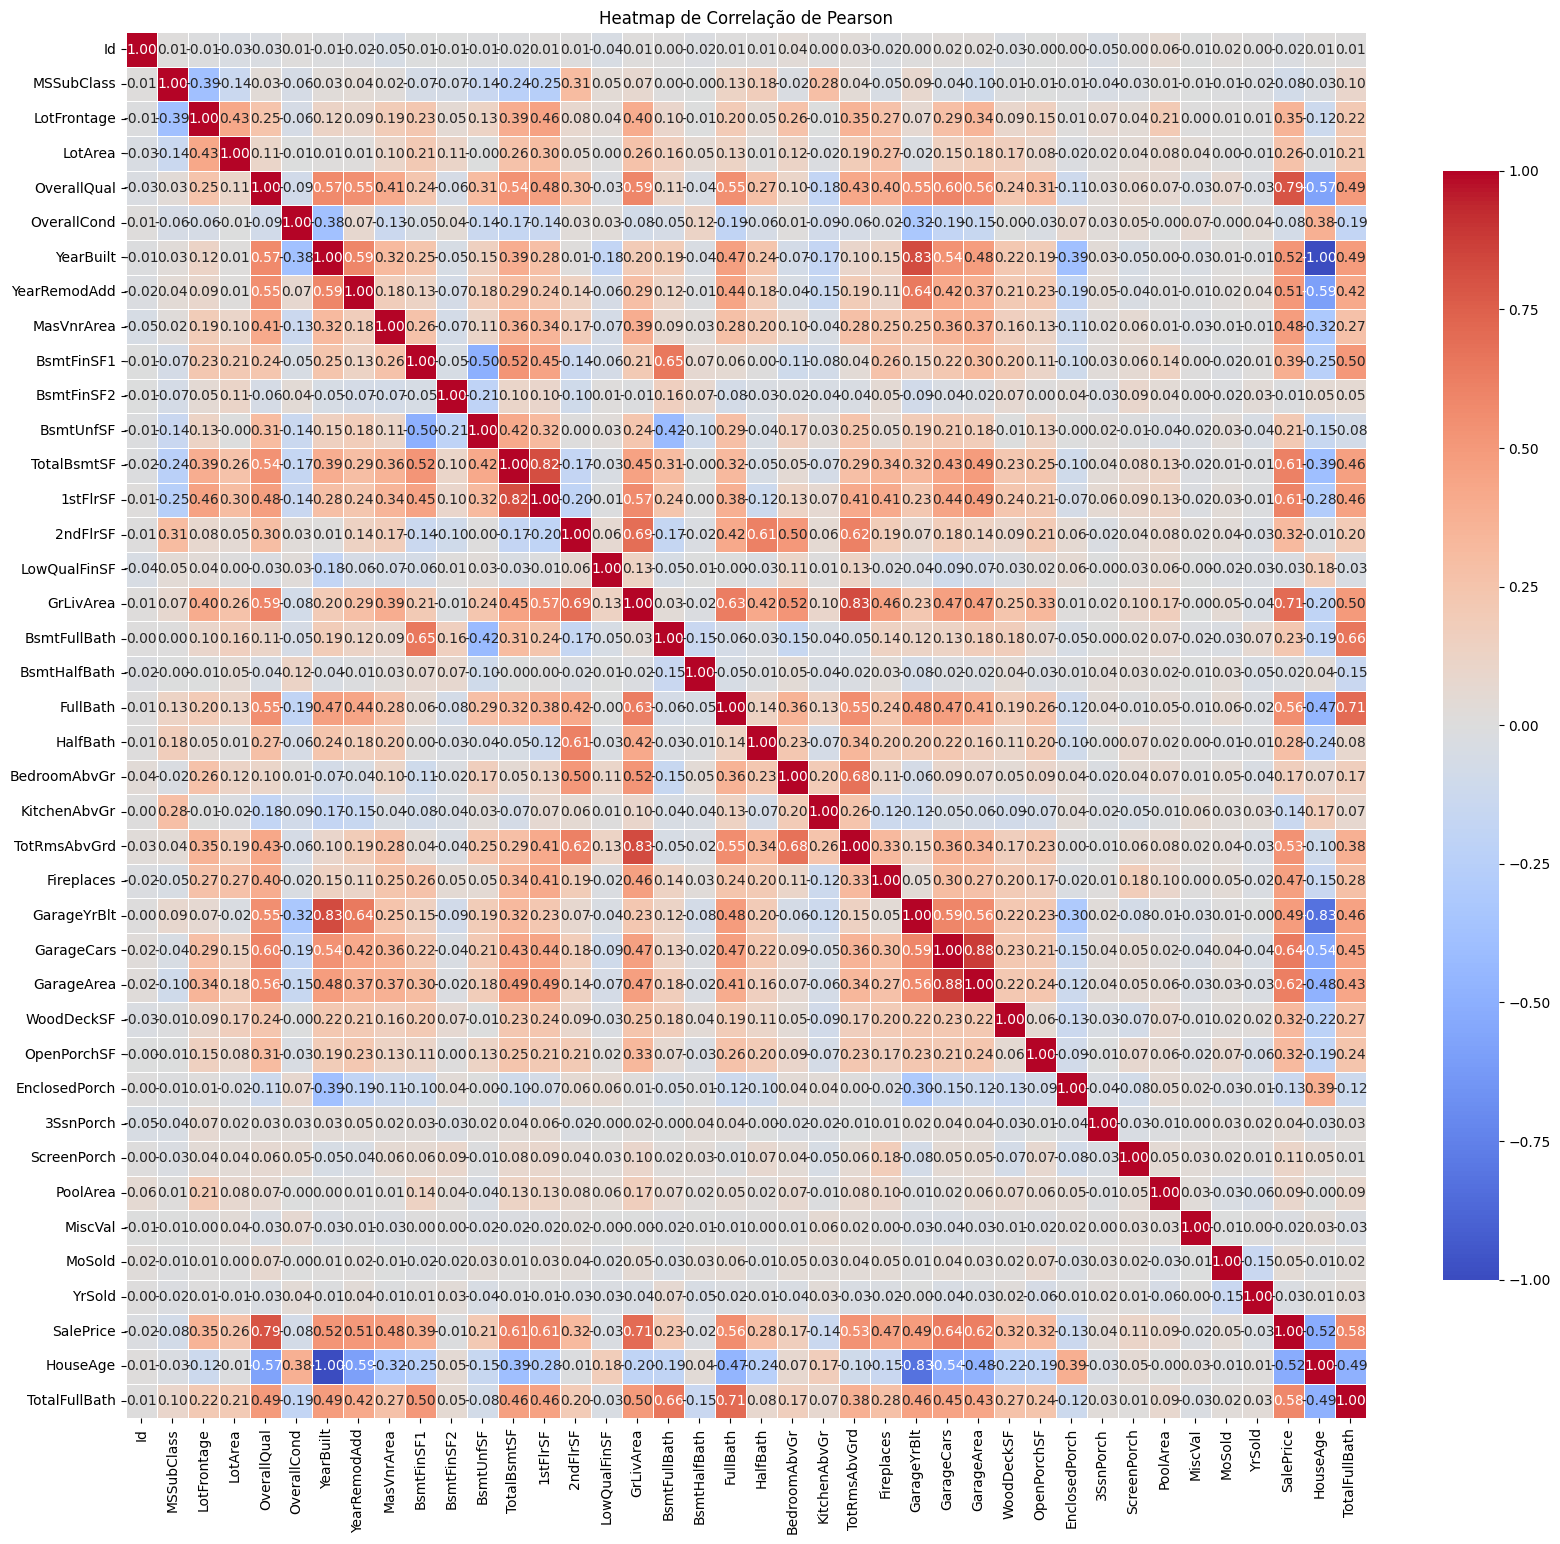

In [42]:
# New correlation heatmap to check if the new features make any difference or not for the model
# Analyze data with new features (Correlation). If makes sense, delete the feature used to create the new one )

# USING DATASET NEW_DATA_TRAIN_NUM

correlation_matrix = new_analysis_data_train_num.corr()

plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      fmt=".2f",
                      cmap='coolwarm',
                      vmin=-1,
                      vmax=1,
                      cbar_kws={'shrink': .8},
                      linewidths=.5)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Heatmap de Correlação de Pearson')

plt.show()

UPDATE:

Creating a feature indicating whether or not there was work on a given property with 0 and 1 [isRemodAdd] made no difference to the model, therefore maintaining the yearremodadd variable

Creating a Feature indicative of whether a house has 2 floors (based on the '2ndFlrSF' feature, if the value is equal to 0, the house does not have 2 floors) made no difference to the model, therefore removing transformation

Creating the TotalHalfBath variable (being a sum of the BsmtHalfBath and HalfBath variables, dropping the latter two) made no difference to the model, therefore removing transformation

In [43]:
# dropping independent variables because of multicollinearity (more than 0.8) and variables
# that originated another feature
drop_numcols_after_analysis = ['GarageYrBlt', 'YearBuilt', 'BsmtFinSF2',
                                              '3SsnPorch', 'TotRmsAbvGrd', 'MoSold', 'YrSold',
                                              'MiscVal', '1stFlrSF', 'BsmtFullBath', 'FullBath',
                                              'GarageCars']

new_analysis_data_train_num = new_analysis_data_train_num.drop(drop_numcols_after_analysis, axis=1)

new_analysis_data_train_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0   1          60         65.0     8450            7            5   
1   2          20         80.0     9600            6            8   
2   3          60         68.0    11250            7            5   
3   4          70         60.0     9550            7            5   
4   5          60         84.0    14260            8            5   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0          2003       196.0         706        150          856       854   
1          1976         0.0         978        284         1262         0   
2          2002       162.0         486        434          920       866   
3          1970         0.0         216        540          756       756   
4          2000       350.0         655        490         1145      1053   

   LowQualFinSF  GrLivArea  BsmtHalfBath  HalfBath  BedroomAbvGr  \
0             0       1710             0         1             3   
1             0       1262             1         0             3   
2             0       1786             0         1             3   
3             0       1717             0         0             3   
4             0       2198             0         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  ScreenPorch  PoolArea  SalePrice  HouseAge  TotalFullBath  
0              0            0         0     208500        21              3  
1              0            0         0     181500        48              2  
2              0            0         0     223500        23              3  
3            272            0         0     140000       109              2  
4              0            0         0     250000        24              3

In [44]:
# Impute Missing values on visualization_data_num (median) with simpleimputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

# Aplicar o imputer no dataset
new_analysis_data_train_num[new_analysis_data_train_num.columns] = imp.fit_transform(new_analysis_data_train_num)

In [45]:
# Checking VIF (degree of multicollinearity) - Consdering values greater than 10 as multicollinear
vif = pd.DataFrame()
vif["Features"] = new_analysis_data_train_num.columns
vif["VIF"] = [variance_inflation_factor(new_analysis_data_train_num.values, i) for i in range(len(new_analysis_data_train_num.columns))]

print(vif)

         Features         VIF
0              Id    4.085436
1      MSSubClass    4.729227
2     LotFrontage   17.238884
3         LotArea    2.667455
4     OverallQual   75.294401
5     OverallCond   35.795893
6    YearRemodAdd  136.221097
7      MasVnrArea    1.860069
8      BsmtFinSF1   17.935178
9       BsmtUnfSF   22.750154
10    TotalBsmtSF   75.220853
11       2ndFlrSF   10.645538
12   LowQualFinSF    1.175875
13      GrLivArea   88.191145
14   BsmtHalfBath    1.175539
15       HalfBath    3.172549
16   BedroomAbvGr   24.246668
17   KitchenAbvGr   34.147066
18     Fireplaces    2.916761
19     GarageArea   11.188277
20     WoodDeckSF    1.895074
21    OpenPorchSF    1.793976
22  EnclosedPorch    1.438270
23    ScreenPorch    1.190983
24       PoolArea    1.099288
25      SalePrice   31.987079
26       HouseAge   12.816439
27  TotalFullBath   22.593670


In [46]:
# filling in categorical features null values with mode strategy
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

analysis_data_train_cat[analysis_data_train_cat.columns] = imp.fit_transform(analysis_data_train_cat)

In [47]:
# Creating a dataset with dummy variables for the categorical data (only for the analysis)
analysis_data_train_cat = pd.get_dummies(analysis_data_train_cat, dtype=int)

In [48]:
# Checking linearity between categorical variables and the target variable
chi_scores = chi2(analysis_data_train_cat, new_analysis_data_train_num['SalePrice'])

chi_scores

(array([1.04850000e+03, 8.67661905e+02, 4.89933847e+02, 1.49505396e+02,
        5.92289968e+02, 8.84662393e+02, 3.65060135e+00, 5.12775451e+02,
        6.51226049e+02, 9.90273810e+02, 2.91960047e+02, 6.45839187e+02,
        7.75907414e+02, 5.80500378e+02, 7.00885298e+01, 1.66095499e-01,
        2.42333333e+02, 5.38162450e+02, 7.04684631e+02, 6.60510360e+02,
        6.86892857e+02, 1.81735156e+02, 3.88819974e+01, 6.76898021e+02,
        6.73067873e+02, 8.89978992e+02, 2.65666667e+02, 6.24632937e+02,
        6.07649891e+02, 4.76848515e+02, 7.12289251e+02, 7.65440031e+02,
        5.48669564e+02, 6.61097425e+02, 7.36171803e+02, 6.86758170e+02,
        5.18487115e+02, 5.52355587e+02, 5.11527337e+02, 4.88434712e+02,
        1.05050750e+03, 1.09023253e+03, 5.79047682e+02, 4.62601210e+02,
        4.45406204e+02, 6.47972693e+02, 8.75173403e+02, 8.72900000e+02,
        8.27861111e+02, 1.00104545e+03, 6.44571699e+02, 5.41969396e+02,
        8.31625641e+01, 2.85621108e+02, 7.20147870e+02, 4.333203

<Axes: >

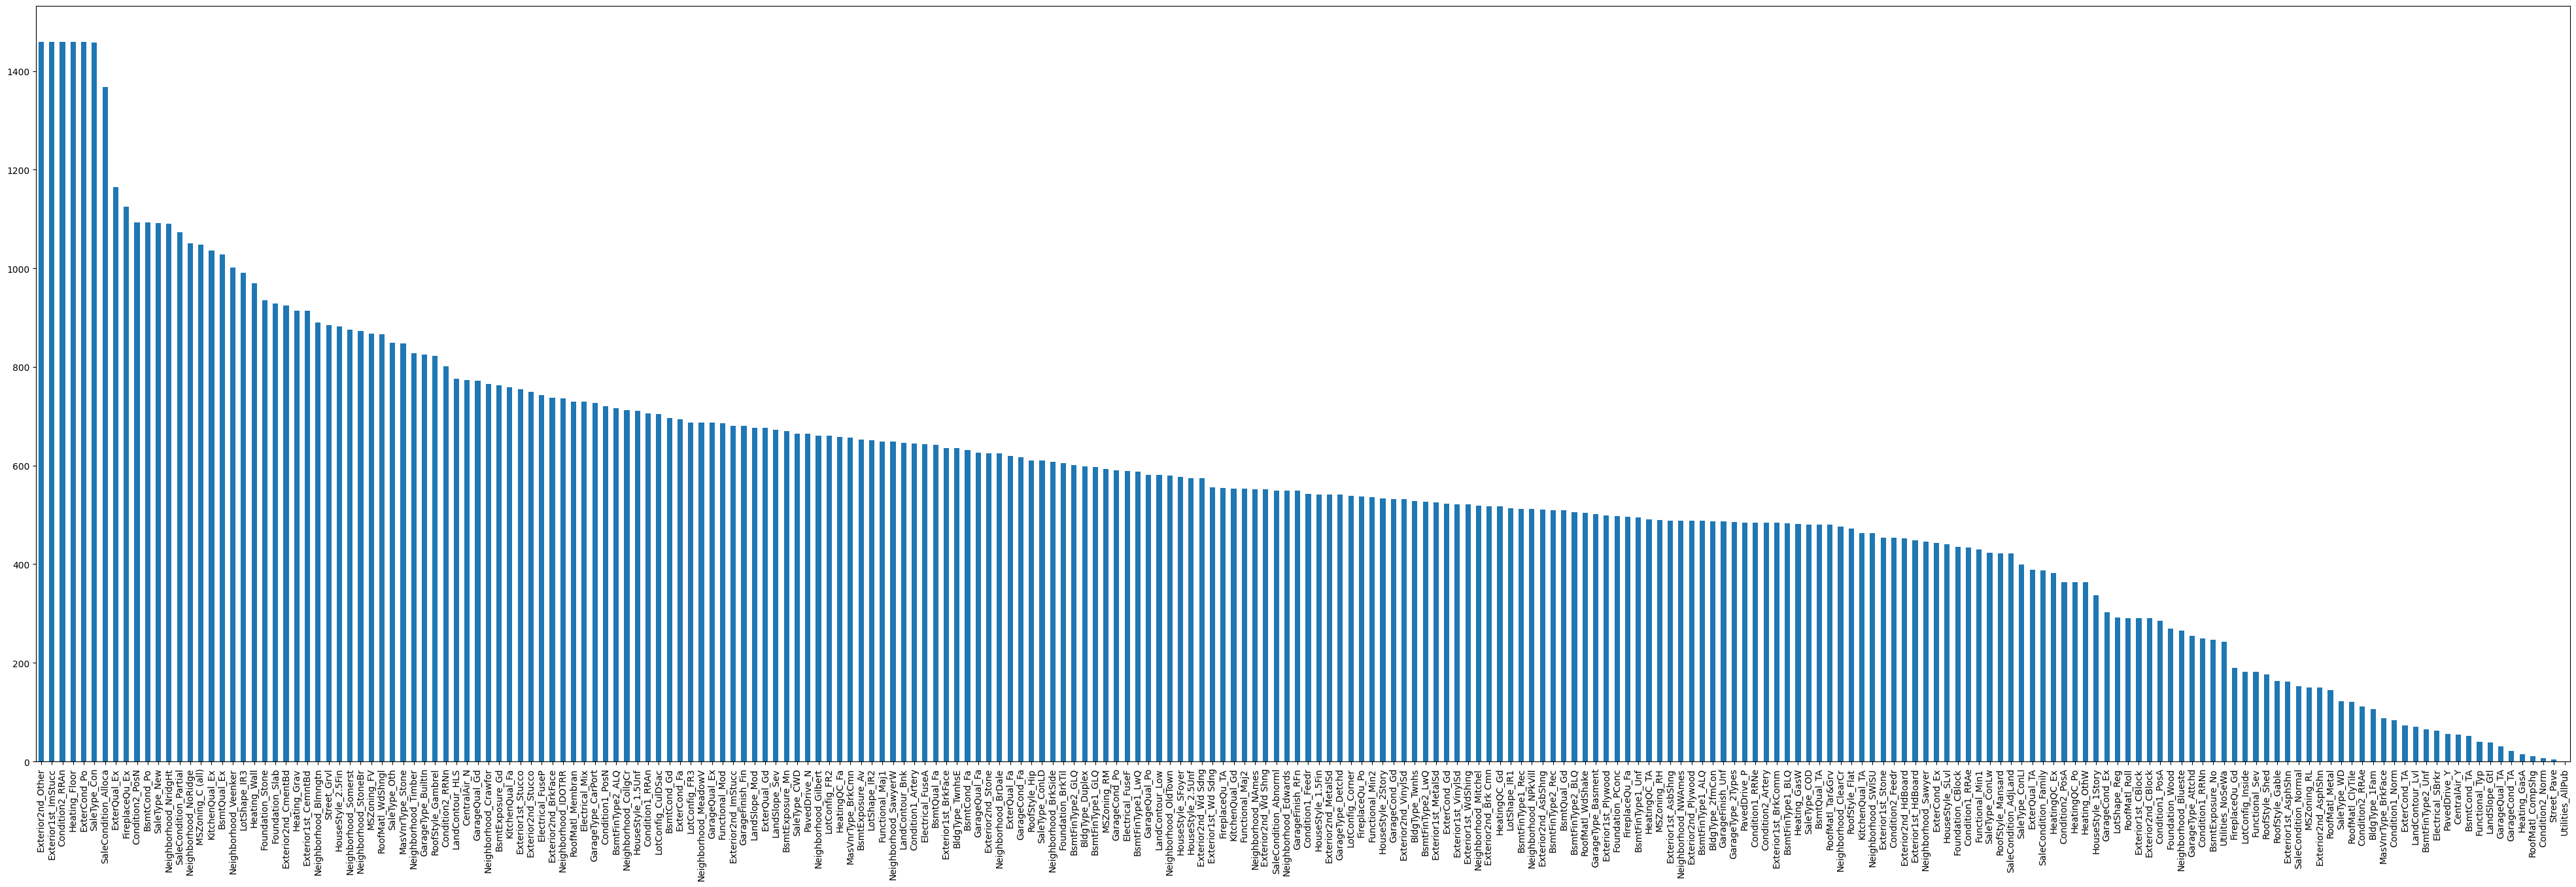

In [97]:
chi_val = pd.Series(chi_scores[0], index=analysis_data_train_cat.columns)
chi_val.sort_values(ascending=False, inplace=True)

# higher the chi value, more important is the feature
chi_val.plot(kind='bar', figsize=(50, 15))

<Axes: >

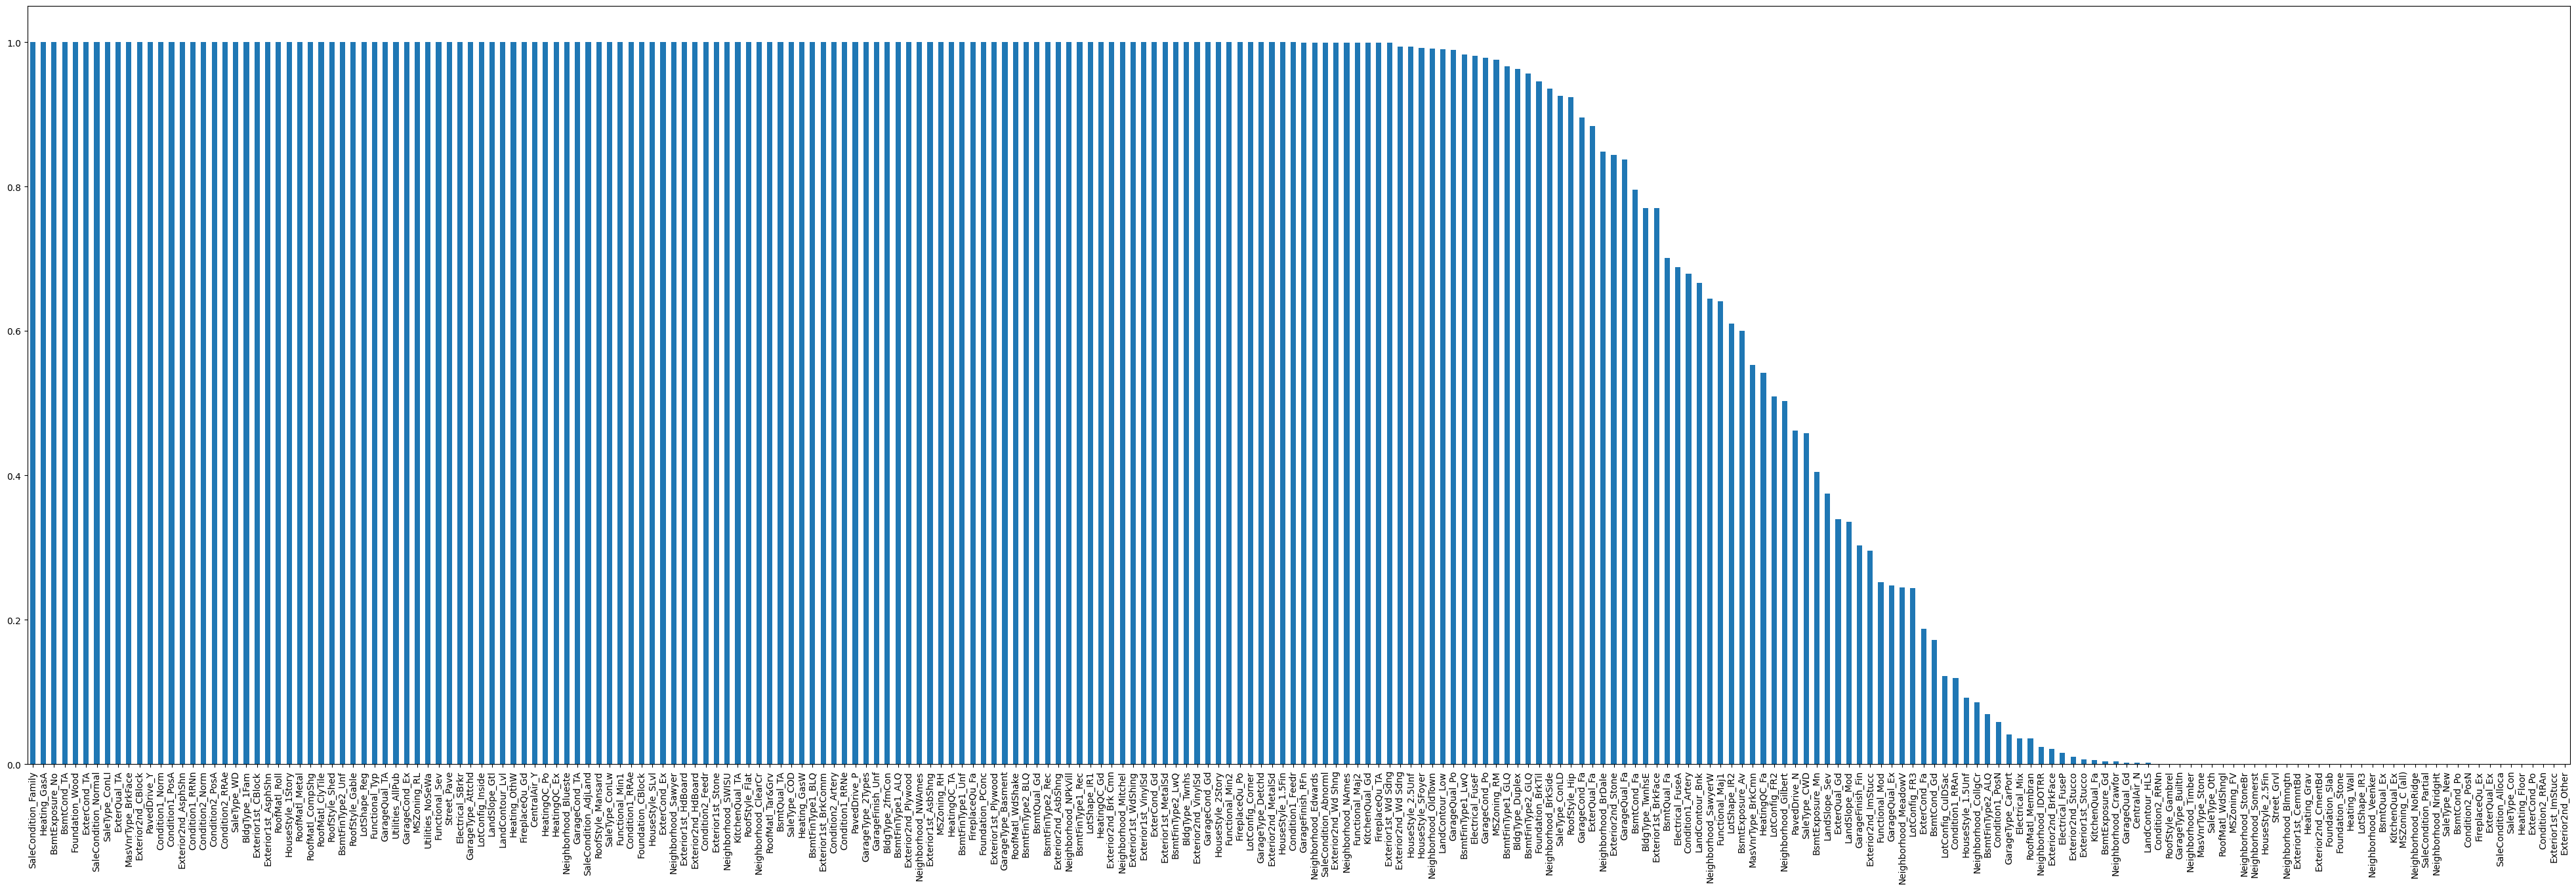

In [98]:
p_val = pd.Series(chi_scores[1], index=analysis_data_train_cat.columns)
p_val.sort_values(ascending=False, inplace=True)

# higher the p-value, lower the importance (considering values higher than 0.5)
p_val.plot(kind='bar', figsize=(50, 15))

In [51]:
# This cell will be unusable because with the modifications in the code we did create a
# dataframe copy just for the analysis, so we didn't use the data_train_num and data_train_cat

# Joining the categorical and new numerical dataset

# new_data_train = new_data_train_num.join(data_train_cat)

# new_data_train.head()

In [52]:
# Separating the sets
X = data_train.drop(['Id', 'SalePrice'], axis=1)
y = np.log1p(data_train['SalePrice']) # Transforming target variable with logarithm
X_test = data_test.drop(['Id'], axis=1)

In [53]:
# Checking the null values in the numerical set
X.select_dtypes(include=['int64', 'float64']).isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [54]:
# Checking the null values in the categorical set
X.select_dtypes(exclude=['int64', 'float64']).isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [55]:
# splitting the train data between train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [56]:
# Had to perform this Feature Enginnering outside the ColumnTransformer because I chose to drop the variables used to
# create others, and within the columntransformer there is no way to perform this drop, that is, the step in this case
# must be done outside and before the column transformer

def cols_engineering(df):

    today = date.today().year
    df['HouseAge'] = today - df['YearBuilt']

    df['TotalFullBath'] = df['FullBath'] + df['BsmtFullBath']

    return df

In [57]:
# Applying the cols_engineering function to the training, validation and test sets
X_train = cols_engineering(X_train)
X_val = cols_engineering(X_val)
X_test = cols_engineering(X_test)

In [58]:
# Dropping discarded numerical features
X_train = X_train.drop(drop_numcols_after_analysis, axis=1)
X_val = X_val.drop(drop_numcols_after_analysis, axis=1)
X_test = X_test.drop(drop_numcols_after_analysis, axis=1)

In [59]:
num_cols = []
cat_nominal_cols = []
cat_ordinal_cols = []

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

cat_nominal_cols = [col for col in X_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist() if col not in cat_ordinal_cols]

In [60]:
print(cat_nominal_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


In [61]:
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'HouseAge', 'TotalFullBath']


Column Transform and Pipeline

In [62]:
# Function that could be useful for log transformation in numerical features

# In this function, variables that are above 1 in the skewness value. Variables with scores from 1 to 10, that is,
# OverallQual and OverallCond would not be considered in this transformation if they had a skewness > 2.

def log_tr(x):
    for i in range(x.shape[1]):
        col = x[:, i]
        # Checking if it's numerical and if it's meets the criteria to apply the log transformation
        if np.issubdtype(col.dtype, np.number) and len(np.unique(col)) > 5 and np.abs(skew(col)) > 2:
            x[:, i] = np.log1p(col)
    return x

In [63]:
# Numerical Transformers

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

num_transformer_with_log = Pipeline (steps = [
    ('imputer', SimpleImputer(strategy="median")),
    ('log_transf', FunctionTransformer(log_tr)),
    ('scaler', StandardScaler())
])

In [64]:
# Categorical values (nominal) Transformer

cat_nom_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# ('iterative_imputer', IterativeImputer(estimator=RandomForestRegressor(), missing_values=np.NaN, verbose=2, max_iter=3))

In [65]:
# Categorical (ordinal) values Transformer

cat_ord_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [66]:
preprocessor = ColumnTransformer(transformers = [
    ('numerical', num_transformer, num_cols),
    ('cat_nominal', cat_nom_transformer, cat_nominal_cols),
    ('cat_ordinal', cat_ord_transformer, cat_ordinal_cols)
])

preprocessor_with_log = ColumnTransformer(transformers = [
    ('numerical_log', num_transformer_with_log, num_cols),
    ('cat_nominal', cat_nom_transformer, cat_nominal_cols),
    ('cat_ordinal', cat_ord_transformer, cat_ordinal_cols)
])

# Pipelines with transformed data and no tunning

In [67]:
pipe_linear_reg_with_log = Pipeline(steps = [
    ('preprocessing', preprocessor_with_log),
    ('model', LinearRegression())
])

pipe_linear_reg_with_log.fit(X_train, y_train)

pred_lr_log = pipe_linear_reg_with_log.predict(X_val)

In [68]:
print("Linear Regression with Log Transform")
print(f"MAE: {mean_absolute_error(y_val, pred_lr_log)}")
print(f"R2: {r2_score(y_val, pred_lr_log)}")

Linear Regression with Log Transform
MAE: 2.254527194139784
R2: -48.54459472476547


In [69]:
pipe_linear_reg = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

pipe_linear_reg.fit(X_train, y_train)

pred_lr = pipe_linear_reg.predict(X_val)

In [83]:
print("Linear Regression with no Log Transform in most of data")
print(f"MAE: {mean_absolute_error(y_val, pred_lr)}")
print(f"R2: {r2_score(y_val, pred_lr)}")

Linear Regression with no Log Transform in most of data
MAE: 0.08257009453563381
R2: 0.8942093615937797


In [71]:
pipe_svr_with_log = Pipeline(steps = [
    ('preprocessing', preprocessor_with_log),
    ('model', SVR())
])

pipe_svr_with_log.fit(X_train, y_train)

pred_svr_log = pipe_svr_with_log.predict(X_val)

In [72]:
print("SVR with Log Transform")
print(f"MAE: {mean_absolute_error(y_val, pred_svr_log)}")
print(f"R2: {r2_score(y_val, pred_svr_log)}")

SVR with Log Transform
MAE: 0.30236527200891583
R2: -0.09029359882895505


In [73]:
pipe_svr = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('model', SVR())
])

pipe_svr.fit(X_train, y_train)

pred_svr = pipe_svr.predict(X_val)

In [74]:
print("SVR with no Log Transform in most of data")
print(f"MAE: {mean_absolute_error(y_val, pred_svr)}")
print(f"R2: {r2_score(y_val, pred_svr)}")

SVR with no Log Transform in most of data
MAE: 0.07403028310747982
R2: 0.9164703771209236


In [75]:
pipe_rfr_with_log = Pipeline(steps = [
    ('preprocessing', preprocessor_with_log),
    ('model', RandomForestRegressor())
])

pipe_rfr_with_log.fit(X_train, y_train)

pred_rfr_log = pipe_rfr_with_log.predict(X_val)

In [80]:
print("Random Forest Regressor with Log Transform")
print(f"MAE: {mean_absolute_error(y_val, pred_rfr_log)}")
print(f"R2: {r2_score(y_val, pred_rfr_log)}")

Random Forest Regressor with Log Transform
MAE: 0.09374317306794905
R2: 0.8658301377223273


In [81]:
pipe_rfr = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())
])

pipe_rfr.fit(X_train, y_train)

pred_rfr = pipe_rfr.predict(X_val)

In [82]:
print("Random Forest Regressor with no Log Transform in most of data")
print(f"MAE: {mean_absolute_error(y_val, pred_rfr)}")
print(f"R2: {r2_score(y_val, pred_rfr)}")

Random Forest Regressor with no Log Transform in most of data
MAE: 0.0936011605661136
R2: 0.8695369820842973


# Pipelines with transformed data and Tunning

In [84]:
# models_with_params = {
#     'svr': {'model': SVR(),
#            'param_grid': {'model__C': [0.1, 1, 10, 100, 1000],
#                           'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                           'model__gamma': ['scale', 'auto'],
#                           'model__degree': [2, 3, 4, 5],
#                           'model__epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]
#                          }
#            },
#     'lr' : {'model' : LinearRegression(),
#            'param_grid': {'model__fit_intercept': [True, False],
#                          'model__fit_intercept': [True, False],
#                          'model__n_jobs': [None, 1, -1]
#                          }
#            },
#     'rfr' : {'model' : RandomForestRegressor(),
#             'param_grid': {'model__n_estimators': [100, 200, 300, 400, 500],
#                            'model__max_features': ['auto', 'sqrt', 'log2'],
#                            'model__max_depth': [None, 10, 20, 30, 40, 50],
#                            'model__min_samples_split': [2, 5, 10],
#                            'model__min_samples_leaf': [1, 2, 4],
#                            'model__bootstrap': [True, False]
#                           }
#             }
# }

# results = {}

In [85]:
# warnings.filterwarnings('ignore')

# for name, inst in models_with_params.items():
#     pipe = Pipeline(steps = [
#         ('preprocessing', preprocessor),
#         ('model', inst['model'])
#     ])

#     rdm_search = RandomizedSearchCV(pipe, inst['param_grid'], n_iter=10, scoring='r2', cv=5, verbose=True)

#     rdm_search.fit(X_train, y_train)

#     results[name] = {
#         'model' : rdm_search.best_estimator_,
#         'score' : rdm_search.best_score_
#     }

In [86]:
# for name, result in results.items():
#     print(f'Model: {name}')
#     print(f'Score: {result["score"]}')
#     print('\n')

# Final Model prediction

In [87]:
#final_pred_log_scale = pipe_svr.predict(X_test)

In [88]:
#final_prediction = np.exp(final_pred_log_scale)